In [214]:
import numpy as np
import matplotlib.pyplot as plt

#task 1
def calc_logloss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-12, 1)
    a = 1.0 - y_pred
    a = np.clip(a, 1e-12, 1)    
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(a))
    return err

In [215]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
#     if i % (iterations / 10) == 0:
#         print(i, W, err, alpha)
    return W, err

In [216]:
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [217]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
X_st = X.copy()

In [218]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

0.6047007196667514

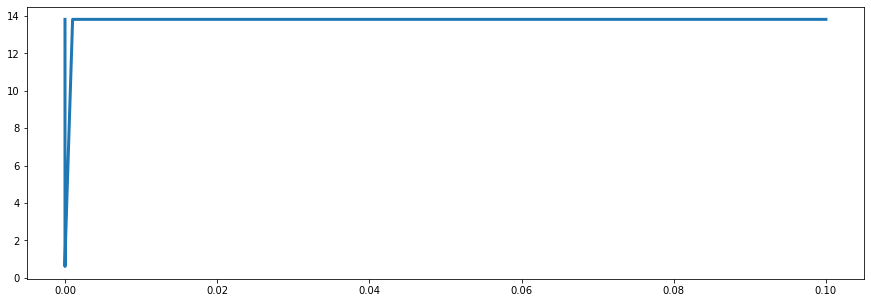

In [219]:
#task 2
def test_alphas(x, alphas, iterations):
    logloss_values = []
    for alpha in (alphas):
        W, err = eval_model(x, y, iterations=iterations, alpha=alpha)
        logloss_values.append(err)
    fig = plt.figure(figsize=(15, 5))
    plt.plot(alphas, logloss_values, linewidth=3)
    return np.amin(logloss_values)
    
test_alphas(X.copy(), [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7], 5000)

0.6042581466234287

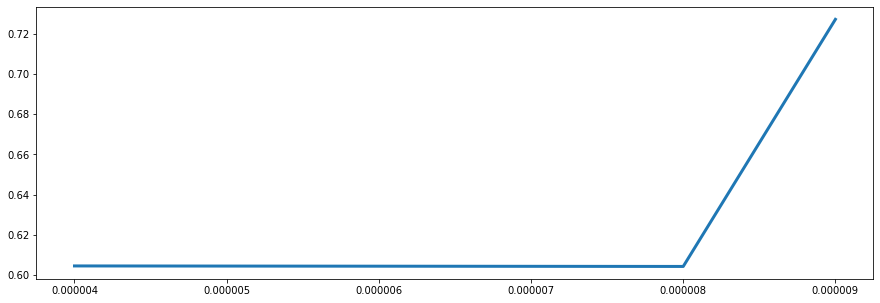

In [220]:
test_alphas(X.copy(), [4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6], 5000)

In [221]:
#task3
def calc_pred_proba(W, X):
    p = 1 / (1 + np.exp(-np.dot(W, X)))
    return p
X_st = X.copy()
W, err = eval_model(X_st, y, iterations=10000, alpha=8e-06)
p = calc_pred_proba(W, X_st)
p

array([0.65864986, 0.54195374, 0.80788375, 0.60174635, 0.39872448,
       0.51475055, 0.67304269, 0.23551474, 0.68558345, 0.69529169])

In [265]:
#task4
def calc_pred(W, X):
    A = sigmoid(np.dot(W.T, X))
    y_pred = []
    print(A)
    for i in (A):
        if (i <= 0.5):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [266]:
y_pred = calc_pred(W, X.copy())
y_pred

[0.65864986 0.54195374 0.80788375 0.60174635 0.39872448 0.51475055
 0.67304269 0.23551474 0.68558345 0.69529169]


[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]

In [273]:
#task5
def accuracy(y, y_pred):
    a = (1 / len(y)) * np.sum(y_pred == y)
    return a

In [286]:
a = accuracy(y, y_pred)
a

0.5

In [420]:
def error_matrix(y, y_pred):
    t = np.zeros(len(y_pred))
    m = [(y_pred == y), (t != y_pred)]
    return m
m = error_matrix(y, y_pred)
m

[array([False, False,  True, False, False, False,  True,  True,  True,
         True]),
 array([ True,  True,  True,  True, False,  True,  True, False,  True,
         True])]

In [438]:
def calc_tp(m):
    return np.sum([m[0][i] and m[1][i] for i in range(len(m[0]))])
def calc_fp(m):
    return np.sum([not (m[0][i]) and m[1][i] for i in range(len(m[0]))])
def calc_fn(m):
    return np.sum([(m[0][i]) and not m[1][i] for i in range(len(m[0]))])

In [439]:
#tp/(tp+fp)
def precision(m):
    tp = calc_tp(m)
    fp = calc_fp(m)
    return tp/(tp + fp)

prec = precision(m)
prec

0.5

In [440]:
#tp/(tp+fn)
def recall(m):
    tp = calc_tp(m)
    fn = calc_fn(m)
    print(fn)
    return tp / (tp + fn)
rec = recall(m)
rec

1


0.8

In [ ]:
#F = (2 * precision * recall) / (presision+recall)
def f1_score(m):
    prec = precision(m)
    rec = recall(m)
    return (2 * prec * rec) / (prec+rec)

f1 = f1